In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cvxpy
%matplotlib inline

# Problem 1
## a)

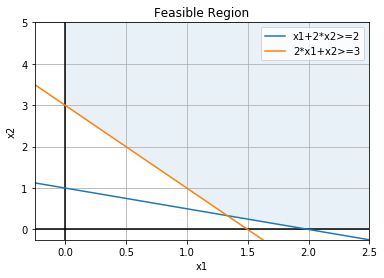

In [2]:
f = lambda x: 3*x[0] + x[1]

x = np.linspace(-1,2.5,50)
cons1 = (2-x)/2
cons2 = 3-2*x

plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.plot(x, cons1, label = 'x1+2*x2>=2')
plt.plot(x, cons2, label = '2*x1+x2>=3')
plt.fill_between(x, np.maximum(0, np.maximum(cons1, cons2)), 50*[10],
                 where = x>=0, alpha = .1)
plt.xlim(xmin = -.25, xmax = 2.5)
plt.ylim(ymin = -.25, ymax = 5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Feasible Region')
plt.legend()
plt.grid()


## b)

x1 is significantly more expensive than x2. The corner point (0, 3) has a cost of 3. The intersection of our two constraints is at a point where x1 is greater than 1. At x1=1, the associated cost would be 3. Since x1 is greater than 1 and the marginal cost is a positive constant, we know that (0, 3) is the minimum.

## c)

In [3]:
x1 = cvxpy.Variable()
x2 = cvxpy.Variable()
cons_list = [2*x1 + x2 >= 3, x1 + 2*x2>=2, x1 >=0, x2 >= 0]

problem = cvxpy.Problem(cvxpy.Minimize(3*x1 + x2), cons_list)
problem.solve()
print('Optimal parameters: (%s, %s) Optimal Value: %s' % (x1.value, x2.value, problem.value))

Optimal parameters: (7.861097117009218e-23, 3.0) Optimal Value: 3.0


# Problem 2

## a)
Decision vars - t  
$min\ \sum_{i \in S,\ j \in D} c_{ij}t_{ij}$  
$s.t.\ \quad \sum_{i \in S}t_{ij}\geq d_j $  
$\quad \quad \ \ \sum_{j \in D}t_{ij}\leq s_i$  
$ \quad \quad \ \ \ t\geq 0 $



## b)

In [4]:
t = cvxpy.Variable((9,))
# (11, 12, 21, 23, 31, 32, 33, 41, 43)
c = np.array([2, 3, 4, 5, 2, 3, 4, 5, 3])
s = np.array([10, 25, 18, 15])
d = np.array([15, 20, 16])

cons = [t[0] + t[1] <= s[0],
       t[2] + t[3] <= s[1],
        t[4] + t[5] + t[6] <= s[2],
        t[7] + t[8] <= s[3],
        t[0] + t[2] + t[4] + t[7] >= d[0],
        t[1] + t[5] >= d[1],
        t[3] + t[6] + t[8] >= d[2],
        t>=0
       ]

problem = cvxpy.Problem(cvxpy.Minimize(cvxpy.sum(cvxpy.multiply(c, t))), cons)
problem.solve()

print('Optimal transport plan: (%s) Optimal Value: %s' % (t.value, problem.value))


Optimal transport plan: ([  1.99975941e+00   8.00024059e+00   7.00000000e+00   1.00000000e+00
   6.00024059e+00   1.19997594e+01  -1.66535672e-22   1.11023193e-22
   1.50000000e+01]) Optimal Value: 154.0


## c)

In [5]:
t = cvxpy.Variable((9,))
# (11, 12, 21, 23, 31, 32, 33, 41, 43)
c = np.array([2, 3, 4, 5, 2, 3, 4, 5, 3])
s = np.array([10, 25, 18, 15])
d = np.array([15, 20, 16])

cons = [t[0] + t[1] <= s[0],
       t[2] + t[3] <= s[1],
        t[4] + t[5] + t[6] <= s[2],
        t[7] + t[8] <= s[3],
        t[0] + t[2] + t[4] + t[7] == d[0],
        t[1] + t[5] == d[1],
        t[3] + t[6] + t[8] == d[2],
        t>=0
       ]

problem = cvxpy.Problem(cvxpy.Minimize(cvxpy.sum(cvxpy.multiply(c, t))), cons)
problem.solve()

print('Optimal transport plan: (%s) Optimal Value: %s' % (t.value, problem.value))


Optimal transport plan: ([  2.00012813e+00   7.99987187e+00   7.00000000e+00   1.00000000e+00
   5.99987187e+00   1.20001281e+01  -8.32658366e-23   1.66532567e-22
   1.50000000e+01]) Optimal Value: 154.0


It returns the same solution. Since this is a minimization problem and all transport has a positive cost, the solver naturally chose a solution that minimizes the amount transported which is the point where demand is exactly supplied, so the problems were equivalent. 

# Problem 3
## a)  

Decision vars - $\theta$, f, p

$min\ c^T p $  
$s.t.\ \quad \forall\ i \in G\ 10<=p_{i}\leq p^{max}_i $  
$\quad \quad \ \ \forall\ (i, j) \in E\ -f_{ij}^{max} \leq f_{ij} \leq f_{ij}^{max} $  
$\quad \quad \ \ \forall\ (i, j) \in E\ \ B_{ij}(\theta_i - \theta_j) = f_{ij} $  
$\quad \quad \ \ \sum_{j \in D}t_{ij}\leq s_i$  
$ \quad \quad \ \ \forall\ i \in G\ \sum_{j \in O(i)}f_{ij} - \sum_{j \in I(i)}f_{ji} = p_i $  
$ \quad \quad \ \ \forall\ i \in D\ \sum_{j \in O(i)}f_{ij} - \sum_{j \in I(i)}f_{ji} = -d_i $  
  
## b)




In [6]:
p = [1, 3, 5]
pmin = np.array([10, 10, 10])
pmax =  np.array([250, 300, 270])
pactual = cvxpy.Variable((3,))
# d = [2, 4, 6]
d =  np.array([90, 100, 125])
c =  np.array([5, 2, 3])
# (12, 23, 34, 45, 56, 61)
flow = cvxpy.Variable((6,))
fmax =  np.array([50, 60, 90, 50, 120, 100])
theta = cvxpy.Variable((6,))
b = np.array( [11.6, 5.9, 13.7, 9.8, 5.6, 10.5])

cons = [pactual <=pmax,
       pactual >= pmin,
       flow <= fmax,
        flow >= -fmax,
        # node potentials
        b[0]*(theta[0]-theta[1]) == flow[0],
        b[1]*(theta[1]-theta[2]) == flow[1],
        b[2]*(theta[2]-theta[3]) == flow[2],
        b[3]*(theta[3]-theta[4]) == flow[3],
        b[4]*(theta[4]-theta[5]) == flow[4],
        b[5]*(theta[5]-theta[0]) == flow[5],
        # Conservation of flow
        flow[0] - flow[5] == pactual[0],
        -flow[1] + flow[2] == pactual[1],
        -flow[3] + flow[4] == pactual[2],
        -flow[0] + flow[1] == -d[0],
        -flow[2] + flow[3] == -d[1],
        -flow[4] + flow[5] == -d[2]       ]
# (12, 23, 34, 45, 56, 61)
obj = cvxpy.Minimize(cvxpy.sum(cvxpy.multiply(pactual, c)))
problem = cvxpy.Problem(obj, cons)
problem.solve()

print('Production: ', pactual.value)
print('Potentials (ordered): ', theta.value)
print('Flows (ordered): ', flow.value)
print('Optimal Value: ', problem.value)

Production:  [  78.52182633  110.          126.47817367]
Potentials (ordered):  [-2.36685386 -4.95306075  5.21643077  1.56679573  6.66883655 -6.98798018]
Flows (ordered):  [ 30.         -60.          50.         -50.          76.47817367
 -48.52182633]
Optimal Value:  992.043652667


## c)

In [7]:
print('Node 6: ', problem.constraints[-1].dual_value)
print('Node 4: ', problem.constraints[-2].dual_value)
print('Node 2: ', problem.constraints[-3].dual_value)

Node 6:  0.0
Node 4:  0.0
Node 2:  0.27850568980369417
